In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
main_dir = './New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [3]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

print()

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


['./New Masks Dataset/Train/Mask/0003.jpg', './New Masks Dataset/Train/Mask/0006.jpg', './New Masks Dataset/Train/Mask/0018.jpg', './New Masks Dataset/Train/Mask/0019.jpg', './New Masks Dataset/Train/Mask/0022.jpg', './New Masks Dataset/Train/Mask/0027.jpg', './New Masks Dataset/Train/Mask/0029.jpg', './New Masks Dataset/Train/Mask/0037.jpg']

['./New Masks Dataset/Train/Non Mask/0.jpg', './New Masks Dataset/Train/Non Mask/1.jpg', './New Masks Dataset/Train/Non Mask/10.jpg', './New Masks Dataset/Train/Non Mask/100.jpg', './New Masks Dataset/Train/Non Mask/101.jpg', './New Masks Dataset/Train/Non Mask/102.jpg', './New Masks Dataset/Train/Non Mask/104.jpg', './New Masks Dataset/Train/Non Mask/105.jpg']


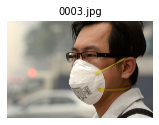

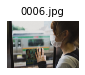

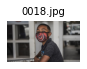

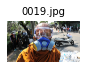

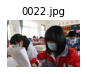

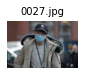

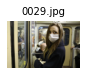

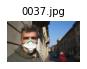

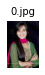

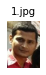

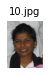

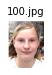

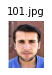

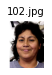

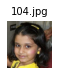

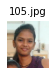

In [4]:
nrows = 4
ncols = 4

plt.figure(figsize=(12,12))

mask_pic =[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic= []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))  

print(mask_pic)
print()
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = plt.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
  
  plt.show()

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip =True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64,64),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(64,64),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(64,64),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [7]:
train_generator.image_shape

(64, 64, 3)

In [11]:
model = Sequential()
model.add(Conv2D(128,(3,3),padding='SAME',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [12]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_generator,
                    epochs = 10,
                    validation_data = valid_generator)

Epoch 1/10
19/19 [==============================] - 20s 1s/step - loss: 0.7844 - accuracy: 0.5397 - val_loss: 0.6237 - val_accuracy: 0.6536
Epoch 2/10
19/19 [==============================] - 16s 866ms/step - loss: 0.4883 - accuracy: 0.7894 - val_loss: 0.4462 - val_accuracy: 0.7843
Epoch 3/10
19/19 [==============================] - 16s 862ms/step - loss: 0.3832 - accuracy: 0.8340 - val_loss: 0.3393 - val_accuracy: 0.8399
Epoch 4/10
19/19 [==============================] - 16s 850ms/step - loss: 0.2646 - accuracy: 0.9027 - val_loss: 0.2998 - val_accuracy: 0.8660
Epoch 5/10
19/19 [==============================] - 16s 841ms/step - loss: 0.2776 - accuracy: 0.8942 - val_loss: 0.3004 - val_accuracy: 0.8791
Epoch 6/10
19/19 [==============================] - 16s 843ms/step - loss: 0.2611 - accuracy: 0.9131 - val_loss: 0.2780 - val_accuracy: 0.8791
Epoch 7/10
19/19 [==============================] - 16s 869ms/step - loss: 0.2996 - accuracy: 0.9014 - val_loss: 0.3220 - val_accuracy: 0.8595
Ep

In [14]:
import tensorflow as tf
import tensorflow.keras as keras

In [15]:
tf.keras.models.save_model(model,'model_x.hdf5')

In [21]:
#history.history.keys()

In [22]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.legend(['training','validation'])
#plt.title('Training and validation loss')
#plt.xlabel('epoch')
#plt.ylabel('loss')

In [23]:
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.legend(['training','validation'])
#plt.title('Training and validation accuracy')
#plt.xlabel('epoch')
#plt.ylabel('accuracy')

In [25]:
#test_loss, test_acc = model.evaluate(test_generator)
#print('test loss:{} test acc:{}'.format(test_loss,test_acc))

In [16]:
import matplotlib.image as mpimg
from keras.preprocessing import image

In [19]:
def test_mask(path):
    im = mpimg.imread(path)
    plt.imshow(im)
    img = image.load_img(path, target_size=(64,64))
    y = image.img_to_array(img)
    y = np.expand_dims(y, axis=0)
    images = np.vstack([y])
    #classes = model.predict_classes(images, batch_size=10)
    classes = model.predict(images, batch_size=10)
    return (classes[0][0])

Mask detected


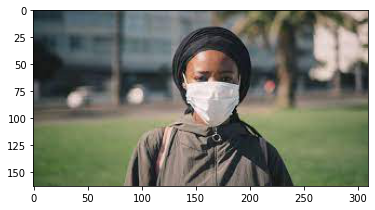

In [22]:
string=test_mask('image.jpg')
if string==0:
    print("Mask detected")
else:
    print("No mask detected")